<a href="https://colab.research.google.com/github/lululu-mia/Data-Science/blob/main/Homework/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Brooklyn Bridge Pedestrian Dataset Analysis**

Import necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell

# Show all outputs in a cell
InteractiveShell.ast_node_interactivity = "all"

# Set plotting style
sns.set(style="whitegrid")
%matplotlib inline

Load data directly from NYC Data website

In [3]:
url = 'https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD'
df = pd.read_csv(url, sep=',')

# Preview data
df.head()
df.info()
df.shape

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1
0,04/30/2019 12:00:00 AM,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
1,12/31/2019 10:00:00 PM,Brooklyn Bridge,10,9,1,cloudy,42.0,0.0005,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
2,12/31/2019 11:00:00 PM,Brooklyn Bridge,2,0,2,cloudy,42.0,0.0004,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
3,12/31/2019 09:00:00 PM,Brooklyn Bridge,12,0,12,cloudy,42.0,0.0036,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
4,04/01/2019 03:00:00 AM,Brooklyn Bridge,1,0,1,clear-night,36.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16057 entries, 0 to 16056
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   hour_beginning     16057 non-null  object 
 1   location           16057 non-null  object 
 2   Pedestrians        16057 non-null  int64  
 3   Towards Manhattan  16057 non-null  int64  
 4   Towards Brooklyn   16057 non-null  int64  
 5   weather_summary    16041 non-null  object 
 6   temperature        16041 non-null  float64
 7   precipitation      16041 non-null  float64
 8   lat                16057 non-null  float64
 9   long               16057 non-null  float64
 10  events             1124 non-null   object 
 11  Location1          16057 non-null  object 
dtypes: float64(4), int64(3), object(5)
memory usage: 1.5+ MB


(16057, 12)

In [6]:
# Convert 'hour_beginning' to datetime
df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])

# Extract date, time, and day of week
df['Date'] = df['hour_beginning'].dt.date
df['Hour'] = df['hour_beginning'].dt.hour
df['DayOfWeek'] = df['hour_beginning'].dt.day_name()

Task 1: Filter the data to include only weekdays (Monday to Friday) and plot a line graph showing the average pedestrian counts for each weekday. This helps to understand the weekly pedestrian pattern on the Brooklyn Bridge.

<Figure size 800x500 with 0 Axes>

Text(0.5, 1.0, 'Pedestrian Counts by Weekday (Mon–Fri)')

Text(0.5, 0, 'Day of Week')

Text(0, 0.5, 'Total Pedestrian Count')

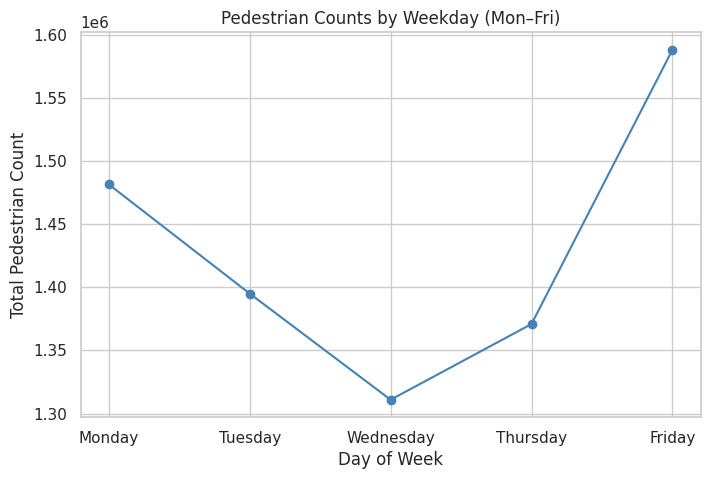

In [7]:
weekday_df = df[df['DayOfWeek'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]

weekday_counts = (
    weekday_df.groupby('DayOfWeek')['Pedestrians']
    .sum()
    .reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
)

plt.figure(figsize=(8, 5))
plt.plot(weekday_counts.index, weekday_counts.values, marker='o', color='steelblue')
plt.title('Pedestrian Counts by Weekday (Mon–Fri)')
plt.xlabel('Day of Week')
plt.ylabel('Total Pedestrian Count')
plt.grid(True)
plt.show()

Task 2: Analyze pedestrian counts for the year 2019 to see how different weather conditions influence pedestrian activity. Group the data by weather summary and compute the average pedestrian count. Also, generate a correlation matrix between pedestrian counts and weather features (temperature, humidity, precipitation) to identify relationships.


Average pedestrian count by weather:
weather_summary
partly-cloudy-day      1574.093627
clear-day              1382.183298
wind                    679.000000
cloudy                  543.225041
rain                    229.822076
snow                    222.631579
fog                     212.409091
sleet                   178.250000
partly-cloudy-night      52.765922
clear-night              33.233871
Name: Pedestrians, dtype: float64

Correlation Matrix:
               Pedestrians  temperature  precipitation
Pedestrians       1.000000     0.358757      -0.105432
temperature       0.358757     1.000000       0.001911
precipitation    -0.105432     0.001911       1.000000


<Figure size 500x400 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation: Weather vs Pedestrian Count (Brooklyn Bridge 2019)')

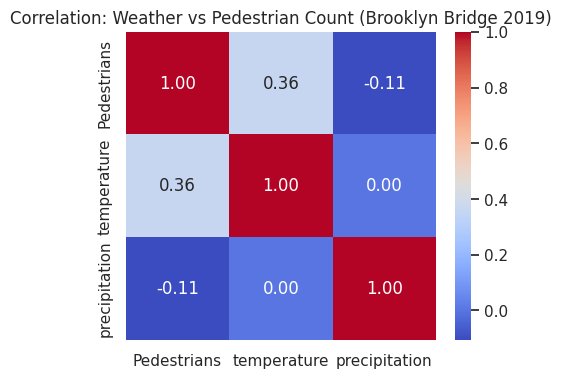

In [8]:
# Filter Brooklyn Bridge and year 2019
brooklyn_2019 = df[
    (df['location'] == 'Brooklyn Bridge') &
    (df['hour_beginning'].dt.year == 2019)
]

# Average pedestrian count by weather summary
weather_summary = (
    brooklyn_2019.groupby('weather_summary')['Pedestrians']
    .mean()
    .sort_values(ascending=False)
)
print("Average pedestrian count by weather:")
print(weather_summary)

# Correlation matrix (pedestrian count vs weather features)
corr_matrix = brooklyn_2019[['Pedestrians', 'temperature', 'precipitation']].corr()

print("\nCorrelation Matrix:")
print(corr_matrix)

plt.figure(figsize=(5, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation: Weather vs Pedestrian Count (Brooklyn Bridge 2019)')
plt.show()

Task 3: Implement a custom function to categorize time of day into Morning, Afternoon, Evening, and Night. Add a new column to the DataFrame for these time categories, and analyze pedestrian activity patterns throughout the day using a bar chart.

<Figure size 700x400 with 0 Axes>

<Axes: xlabel='TimeOfDay', ylabel='Pedestrians'>

Text(0.5, 1.0, 'Average Pedestrian Activity by Time of Day')

Text(0.5, 0, 'Time of Day')

Text(0, 0.5, 'Average Pedestrian Count')

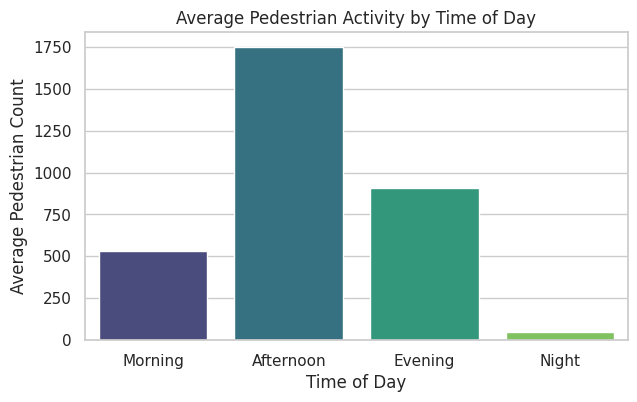

In [10]:
def categorize_time(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['TimeOfDay'] = df['Hour'].apply(categorize_time)

# Calculate average pedestrian counts by time of day
time_activity = (
    df.groupby('TimeOfDay')['Pedestrians']
    .mean()
    .reindex(['Morning', 'Afternoon', 'Evening', 'Night'])
    .reset_index()
)

# Plot
plt.figure(figsize=(7, 4))
sns.barplot(x='TimeOfDay', y='Pedestrians', hue='TimeOfDay',
            data=time_activity, palette='viridis', legend=False)

plt.title('Average Pedestrian Activity by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Average Pedestrian Count')
plt.show()